In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [82]:
#df = pd.read_csv('../../../MasterThesis/VoithDatenMilliSeconds.csv', sep=';'  , engine='python')
#15:07 Filtere Startereignisse
conn = pyodbc.connect(r"driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;")
conx_string = "driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;"
#query = "SELECT TOP (1000) [Email],[Avatar],[Avg  Session Length],[Time on App],[Time on Website],[Length of Membership],[Yearly Amount Spent] FROM [AdventureWorks2016].[dbo].[userDB]"
query2 = "SELECT TOP (2000) [PRS_START_TIME],[PRS_END_TIME],[PRS_STATE],[PRS_BUSINESS_KEY],try_convert(float, RIGHT(PRS_Business_key, len(PRS_BUSINESS_KEY) - charindex(':', prs_business_key))) as Business_Key, try_convert(float, DATEDIFF(MILLISECOND, PRS_START_TIME,PRS_END_TIME)) as Process_Time FROM [ORCHESTRA].[dbo].[ORC_PROCESS_STATE];"
SQLquery = pd.read_sql_query(query2, conn)
conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query2);
data = cursor.fetchall()
print(data[:5])
type(data)
type(SQLquery)
print(SQLquery)
df = pd.DataFrame(SQLquery, columns=['PRS_STATE','Business_Key', 'Process_Time'])
df.head(20)

[(datetime.datetime(2021, 8, 27, 8, 51, 43, 717000), datetime.datetime(2021, 8, 27, 8, 51, 51, 930000), Decimal('9'), 'random: 0.9180758088473527', 0.9180758088473527, 8214.0), (datetime.datetime(2021, 8, 27, 8, 52, 3, 710000), datetime.datetime(2021, 8, 27, 8, 52, 11, 757000), Decimal('9'), 'random: 0.9732578012786509', 0.9732578012786509, 8046.0), (datetime.datetime(2021, 8, 27, 8, 52, 13, 707000), datetime.datetime(2021, 8, 27, 8, 52, 21, 767000), Decimal('9'), 'random: 0.9071021313512667', 0.9071021313512667, 8060.0), (datetime.datetime(2021, 8, 27, 8, 52, 23, 703000), datetime.datetime(2021, 8, 27, 8, 52, 31, 740000), Decimal('9'), 'random: 0.915213224553411', 0.915213224553411, 8037.0), (datetime.datetime(2021, 8, 27, 8, 52, 53, 710000), datetime.datetime(2021, 8, 27, 8, 53, 1, 793000), Decimal('9'), 'random: 0.8164679135265177', 0.8164679135265177, 8083.0)]
             PRS_START_TIME            PRS_END_TIME  PRS_STATE  \
0   2021-08-27 08:51:43.717 2021-08-27 08:51:51.930      

,PRS_STATE,Business_Key,Process_Time
0,9.0,0.918076,8214.0
1,9.0,0.973258,8046.0
2,9.0,0.907102,8060.0
3,9.0,0.915213,8037.0
4,9.0,0.816468,8083.0
5,9.0,0.944578,8066.0
6,9.0,0.955979,8053.0
7,9.0,0.954573,8064.0
8,9.0,0.980506,8040.0
9,9.0,0.949070,8113.0


In [83]:
len(df)

903

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRS_STATE     903 non-null    float64
 1   Business_Key  903 non-null    float64
 2   Process_Time  903 non-null    float64
dtypes: float64(3)
memory usage: 21.3 KB


In [85]:
df[df['PRS_STATE'] == 18]

,PRS_STATE,Business_Key,Process_Time


In [86]:
df.isnull().sum()

PRS_STATE       0
Business_Key    0
Process_Time    0
dtype: int64

In [87]:
df['PRS_STATE'] = pd.get_dummies(df['PRS_STATE'], drop_first=True)

In [88]:
df2 = df

In [89]:
X = df2.drop('PRS_STATE', axis=1).values
y = df2['PRS_STATE'].values
X
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=101)

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
y_train
#y_test
#X_train
#X_test

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [94]:
X_train.shape

(812, 2)

In [95]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
model = Sequential()

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [97]:
model.fit(x=X_train, y=y_train, epochs=500, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/500
4/4 [==============================] - 0s 41ms/step - loss: 0.6645 - val_loss: 0.6675
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6646 - val_loss: 0.6651
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6632 - val_loss: 0.6628
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6590 - val_loss: 0.6605
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6567 - val_loss: 0.6584
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6539 - val_loss: 0.6562
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6547 - val_loss: 0.6543
Epoch 8/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6553 - val_loss: 0.6526
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6497 - val_loss: 0.6510
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6477 - val_loss: 0.6496
Epoch 11/500
4/4 [==========

4/4 [==============================] - 0s 7ms/step - loss: 0.5904 - val_loss: 0.5524
Epoch 85/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5962 - val_loss: 0.5516
Epoch 86/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5905 - val_loss: 0.5500
Epoch 87/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5954 - val_loss: 0.5485
Epoch 88/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5867 - val_loss: 0.5471
Epoch 89/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5876 - val_loss: 0.5464
Epoch 90/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5837 - val_loss: 0.5449
Epoch 91/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5841 - val_loss: 0.5427
Epoch 92/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5810 - val_loss: 0.5410
Epoch 93/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5773 - val_loss: 0.5394
Epoch 94/500
4/4 [===============

4/4 [==============================] - 0s 6ms/step - loss: 0.5467 - val_loss: 0.4455
Epoch 168/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5469 - val_loss: 0.4436
Epoch 169/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5360 - val_loss: 0.4424
Epoch 170/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5446 - val_loss: 0.4407
Epoch 171/500
4/4 [==============================] - ETA: 0s - loss: 0.547 - 0s 6ms/step - loss: 0.5487 - val_loss: 0.4398
Epoch 172/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5634 - val_loss: 0.4402
Epoch 173/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5344 - val_loss: 0.4411
Epoch 174/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5668 - val_loss: 0.4419
Epoch 175/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5412 - val_loss: 0.4410
Epoch 176/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5343 - val_loss: 0.4391


4/4 [==============================] - 0s 5ms/step - loss: 0.4767 - val_loss: 0.3302
Epoch 250/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4418 - val_loss: 0.3303
Epoch 251/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4420 - val_loss: 0.3288
Epoch 252/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4251 - val_loss: 0.3275
Epoch 253/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4308 - val_loss: 0.3259
Epoch 254/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4504 - val_loss: 0.3237
Epoch 255/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4482 - val_loss: 0.3223
Epoch 256/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4594 - val_loss: 0.3197
Epoch 257/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4480 - val_loss: 0.3172
Epoch 258/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4278 - val_loss: 0.3162
Epoch 259/500
4/4 [=====

Epoch 332/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3871 - val_loss: 0.2257
Epoch 333/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3927 - val_loss: 0.2268
Epoch 334/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3934 - val_loss: 0.2261
Epoch 335/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4081 - val_loss: 0.2245
Epoch 336/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3778 - val_loss: 0.2233
Epoch 337/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3918 - val_loss: 0.2227
Epoch 338/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3879 - val_loss: 0.2222
Epoch 339/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3999 - val_loss: 0.2213
Epoch 340/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3887 - val_loss: 0.2202
Epoch 341/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4105 - val_loss: 0.2198
Epoch 342/

4/4 [==============================] - 0s 6ms/step - loss: 0.3819 - val_loss: 0.1822
Epoch 415/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3656 - val_loss: 0.1826
Epoch 416/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3631 - val_loss: 0.1822
Epoch 417/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3604 - val_loss: 0.1812
Epoch 418/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3590 - val_loss: 0.1802
Epoch 419/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3536 - val_loss: 0.1793
Epoch 420/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3757 - val_loss: 0.1791
Epoch 421/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3783 - val_loss: 0.1795
Epoch 422/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3513 - val_loss: 0.1796
Epoch 423/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3681 - val_loss: 0.1790
Epoch 424/500
4/4 [=====

4/4 [==============================] - 0s 6ms/step - loss: 0.3368 - val_loss: 0.1616
Epoch 497/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3749 - val_loss: 0.1612
Epoch 498/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3544 - val_loss: 0.1605
Epoch 499/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3445 - val_loss: 0.1598
Epoch 500/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3606 - val_loss: 0.1595


In [98]:
predictions = (model.predict(X_test))
predictions
#y_test
predictions = (predictions>0.5) # It will evaluate the logical expression y_predict>0.25 and return True or False 
predictions

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [99]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

3/3 [==============================] - 0s 1ms/step - loss: 0.1595
0.15951833128929138


In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        39

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [101]:
confusion_matrix(y_test, predictions)

array([[52,  0],
       [ 0, 39]], dtype=int64)

In [102]:
################################
#Use model on full data set
################################

In [103]:
predictions = (model.predict(scaler.transform(X)))
predictions
#y_test
predictionsTF = (predictions>0.5) # It will evaluate the logical expression y_predict>0.5 and return True or False 
predictionsTF

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [106]:
y_all = model.predict(scaler.transform(X))
predictTF = (y_all>0.5)

df['pred'] = predictTF

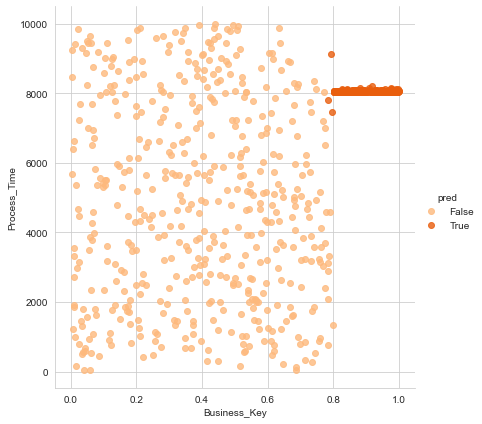

In [110]:
#Visualize prediction results with hue='pred'
sns.set_style('whitegrid')
sns.lmplot('Business_Key','Process_Time',data=df, hue='pred',
           palette='Oranges',height=6,aspect=1,fit_reg=False)